## Final Project Submission

Please fill out:
* Student name: Purity Murugi Riungu
* Student pace: part time 
* Scheduled project review date/time: 13/4/2023
* Instructor name: Noah Kandie
* Blog post URL:



Data Understanding.

In this project, i will work with various datasets which was collected from various locations.Some data are compressed CSV,TSV and IMDB.
The data to be used is contained in files below;
 1. im.db.zip
 2. bom.movie_gross.csv.gz

Business Understanding.

The Business Questions that will be tackled in the session will be;

1. What are the most successiful genres of movies?
2. What are the key characteristics of successiful movies? For instance the ethralling storyline, the Characters/cast.
3. How can Microsoft new movie studio position it self to be come the best?

In [1]:
# Your code here - remember to use markdown cells for comments as well!

# import necessary libraries/data from the zipped files.

import csv
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

The first step is to import all the necessary libraries.
for instance;
Pandas as pd,
numpy as np,
import csv,
matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Data Preparation

The Next step is to read the data from bom.movie_gross.csv.gz

In [2]:
# using pandas to load the csv file

import csv

bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#preview the data

bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Read the data of other files

In [5]:
import csv

tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#preview the data in tn.movie

tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Data analysis and data cleaning
To clean the Data in tn_df dataset
Removing special characters.

In [8]:
# Define regular expression pattern to match special characters
pattern = r'[^a-zA-Z0-9\s]'

# Define function to clean text
def clean_text(text):
    text = re.sub(pattern, '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = text.title()  # convert to lowercase
    text = text.strip()  # remove leading and trailing spaces
    return text

In [9]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


C:\Users\User\AppData\Local\Temp\ipykernel_12160\2912545500.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_12160\2912545500.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_12160\2912545500.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal

In [10]:
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [11]:
import csv

rt_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Next step is to read the data from all data files provided and review/analyse the data.

In [12]:
#preview the data in tn.movie

rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [13]:
rt_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [14]:
import csv

rt_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',encoding = 'latin1')

rt_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
import csv

reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',encoding = 'latin1')

reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [17]:
reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [18]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [20]:
tmdb_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [21]:
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Data Cleaning
The next step will be to perform data cleaning.
1. Identify the missing values in the various data sets.


In [22]:
#tn movie budgets

tn_df.isna()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [23]:
tn_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
reviews_df.isna()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...
54427,False,False,True,False,False,False,False,False
54428,False,True,False,False,False,False,False,False
54429,False,True,False,False,False,False,False,False
54430,False,True,False,False,False,False,False,False


In [25]:
reviews_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [26]:
rt_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [27]:
bom_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [28]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

After identifying the missing Data, we examine and decide on how to deal with the missing data.

In [29]:
 #check for missing percentages in bom_df 

missing_percentages =(bom_df.isna()/ len(bom_df))*100

print(missing_percentages)

      title  studio  domestic_gross  foreign_gross  year
0       0.0     0.0             0.0       0.000000   0.0
1       0.0     0.0             0.0       0.000000   0.0
2       0.0     0.0             0.0       0.000000   0.0
3       0.0     0.0             0.0       0.000000   0.0
4       0.0     0.0             0.0       0.000000   0.0
...     ...     ...             ...            ...   ...
3382    0.0     0.0             0.0       0.029525   0.0
3383    0.0     0.0             0.0       0.029525   0.0
3384    0.0     0.0             0.0       0.029525   0.0
3385    0.0     0.0             0.0       0.029525   0.0
3386    0.0     0.0             0.0       0.029525   0.0

[3387 rows x 5 columns]


In [30]:
#checking for unique values

bom_df['foreign_gross'].unique()


array(['652000000', '691300000', '664300000', ..., '530000', '256000',
       '30000'], dtype=object)

In [31]:
bom_df = bom_df.drop("foreign_gross", axis=1)

print(bom_df)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      year  
0     2010  
1

In [32]:
#checkng for duplicates values

duplicates =reviews_df[reviews_df.duplicated(subset= 'review')]

print(len(duplicates))

duplicates.head()

5749


,id,review,rating,fresh,critic,top_critic,publisher,date
169,5,NaN,3/5,fresh,Cole Smithey,0,ColeSmithey.com,"October 10, 2005"
170,5,NaN,2/5,rotten,Chuck O'Leary,0,Fantastica Daily,"October 9, 2005"
171,5,NaN,3/5,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"April 28, 2005"
172,5,NaN,3/5,fresh,Eric Melin,0,Lawrence.com,"August 24, 2004"
173,5,NaN,6/10,fresh,Dragan Antulov,0,rec.arts.movies.reviews,"November 5, 2003"


To Answer the first question, 

I will look at earnings of different movies
I will check the review ratings in different movies

In [33]:
import csv

rt_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

genre_df = rt_df[['genre']]

print(rt_df.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [34]:
print(rt_df.shape)

(1560, 12)


In [35]:
print(genre_df.head())

                                 genre
0  Action and Adventure|Classics|Drama
1    Drama|Science Fiction and Fantasy
2    Drama|Musical and Performing Arts
3           Drama|Mystery and Suspense
4                        Drama|Romance


In [36]:
import csv

rt_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

genre_rating_df = rt_df[['genre','rating']]

print(rt_df.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [37]:
print(genre_rating_df.head())

                                 genre rating
0  Action and Adventure|Classics|Drama      R
1    Drama|Science Fiction and Fantasy      R
2    Drama|Musical and Performing Arts      R
3           Drama|Mystery and Suspense      R
4                        Drama|Romance     NR


Rename the movie to itle name to have wo smilar columns to merge.

Joining of two datasets with a unique column:

In [38]:
tn_df = tn_df.rename(columns={'movie': 'title'})

In [39]:
tn_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [40]:
merged_bom_tn_df = pd.merge(bom_df,tn_df,on='title')
merged_bom_tn_df

,title,studio,domestic_gross_x,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,2010,47,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,2010,38,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,2010,27,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,53,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,2010,15,"May 7, 2010",170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,2018,64,"Jun 15, 2018",10000000.0,4286367.0,6.089100e+06
1243,Ben is Back,RAtt.,3700000.0,2018,95,"Dec 7, 2018",13000000.0,3703182.0,9.633111e+06
1244,Bilal: A New Breed of Hero,VE,491000.0,2018,100,"Feb 2, 2018",30000000.0,490973.0,6.485990e+05
1245,Mandy,RLJ,1200000.0,2018,71,"Sep 14, 2018",6000000.0,1214525.0,1.427656e+06


In [41]:
merged_bom_tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   year               1247 non-null   int64  
 4   id                 1247 non-null   int64  
 5   release_date       1247 non-null   object 
 6   production_budget  1247 non-null   float64
 7   domestic_gross_y   1247 non-null   float64
 8   worldwide_gross    1247 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 97.4+ KB


In [42]:
df_profit = merged_bom_tn_df['worldwide_gross'] - merged_bom_tn_df['production_budget']

print(df_profit)

0       868879522.0
1       675524642.0
2       591244673.0
3       638102828.0
4       451156389.0
           ...     
1242     -3910900.0
1243     -3366889.0
1244    -29351401.0
1245     -4572344.0
1246     -5544973.0
Length: 1247, dtype: float64


Data Visualisation

#Visualisation of the Worldwide_gross and Production Budget.

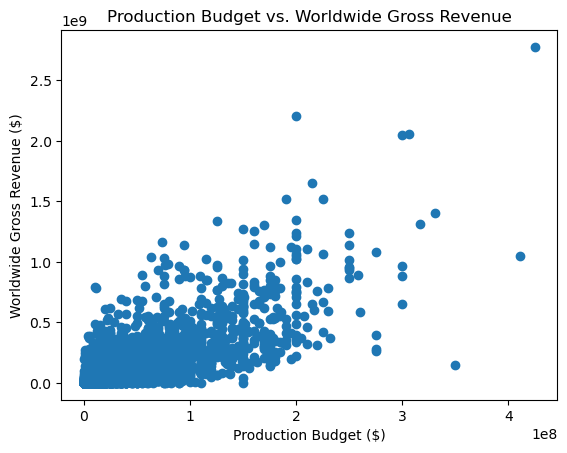

In [66]:
import matplotlib.pyplot as plt

# Create a scatter plot of production_budget vs. worldwide_gross
plt.scatter(tn_df['production_budget'], tn_df['worldwide_gross'])

# Set the x-axis and y-axis labels
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Revenue ($)')

# Set the plot title
plt.title('Production Budget vs. Worldwide Gross Revenue')

# Show the plot
plt.show()

Now lets look at the Cost verses the revenue of different movies.

Plot a graph between domestic and wordwide gross


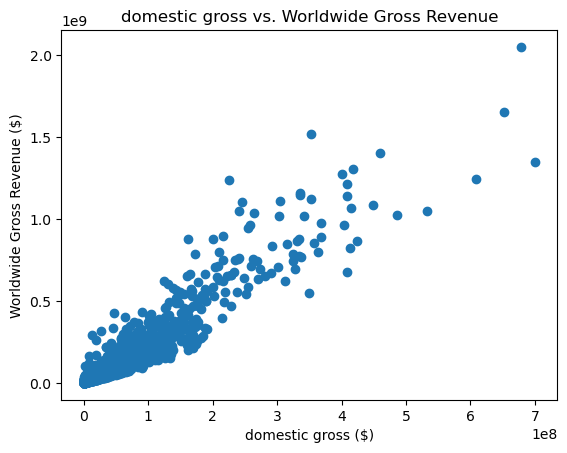

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot of domestic_gross_y vs. worldwide_gross
plt.scatter(merged_bom_tn_df['domestic_gross_y'], merged_bom_tn_df['worldwide_gross'])

# Set the x-axis and y-axis labels
plt.xlabel('domestic gross ($)')
plt.ylabel('Worldwide Gross Revenue ($)')

# Set the plot title
plt.title('domestic gross vs. Worldwide Gross Revenue')

# Show the plot
plt.show()

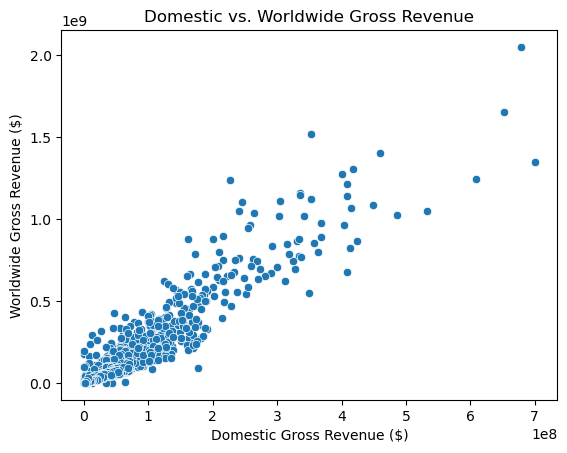

In [47]:
import seaborn as sns

# Create a scatter plot of domestic and worldwide gross revenue for each movie
sns.scatterplot(x='domestic_gross_x', y='worldwide_gross', data=merged_bom_tn_df)

# Set the axis labels and title
plt.xlabel('Domestic Gross Revenue ($)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.title('Domestic vs. Worldwide Gross Revenue')

# Show the plot
plt.show()


In [50]:
print(tmdb_df.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [51]:
#join the tmdb data and bom movie data

merged_bom_tmdb_df = pd.merge(bom_df,tmdb_df,on='title')

merged_bom_tmdb_df

,title,studio,domestic_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.0,2018,16803,"[53, 28]",459814,en,The Escape,0.600,2015-08-14,7.0,1
2699,The Escape,IFC,14000.0,2018,19053,"[53, 28]",417004,en,The Escape,1.176,2016-10-23,6.6,10
2700,Souvenir,Strand,11400.0,2018,18483,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14
2701,The Quake,Magn.,6200.0,2018,24107,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81


In [52]:
import csv

tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

title_vote_df = tmdb_df[['title','vote_average']]

print(tmdb_df.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
print(title_vote_df.head())

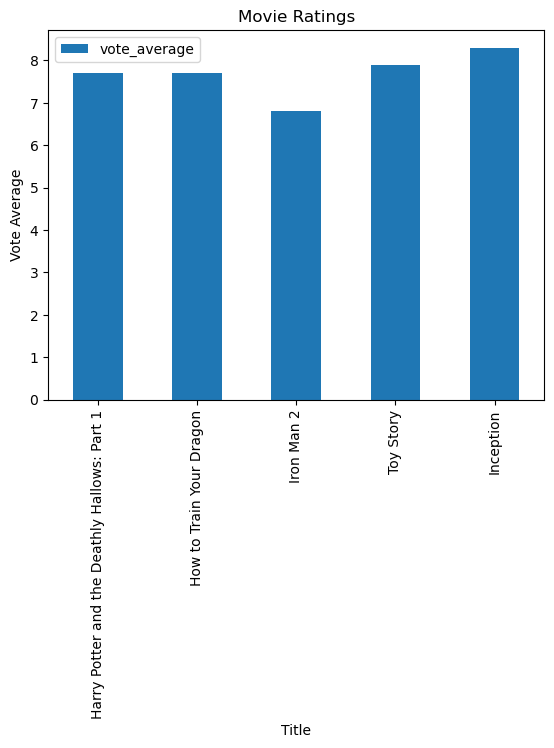

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame
data = {
    'title': ['Harry Potter and the Deathly Hallows: Part 1', 'How to Train Your Dragon', 'Iron Man 2', 'Toy Story', 'Inception'],
    'vote_average': [7.7, 7.7, 6.8, 7.9, 8.3]
}
df = pd.DataFrame(data)

# Create a bar plot
df.plot(kind='bar', x='title', y='vote_average')

# Set the plot title and axis labels
plt.title('Movie Ratings')
plt.xlabel('Title')
plt.ylabel('Vote Average')

# Show the plot
plt.show()

In [54]:
import csv

bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

income_df = bom_df[['title','foreign_gross']]

print(income_df.columns)

Index(['title', 'foreign_gross'], dtype='object')


In [55]:
print(income_df.head())

                                         title foreign_gross
0                                  Toy Story 3     652000000
1                   Alice in Wonderland (2010)     691300000
2  Harry Potter and the Deathly Hallows Part 1     664300000
3                                    Inception     535700000
4                          Shrek Forever After     513900000


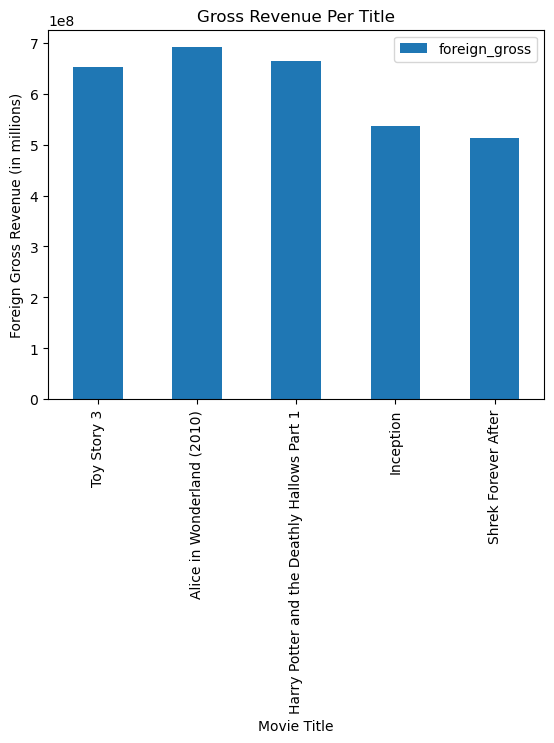

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame
data = {
    'title': ['Toy Story 3', 'Alice in Wonderland (2010)', 'Harry Potter and the Deathly Hallows Part 1', 'Inception', 'Shrek Forever After'],
    'foreign_gross': [652000000, 691300000, 664300000, 535700000, 513900000]
}
df = pd.DataFrame(data)

# Create a bar plot
df.plot(kind='bar', x='title', y='foreign_gross')

# Set the plot title and axis labels
plt.title('Gross Revenue Per Title')
plt.xlabel('Movie Title')
plt.ylabel('Foreign Gross Revenue (in millions)')

# Show the plot
plt.show()


From above workings, it clearly shows that there is no direct relationship between the movie with the highest viewing on average and the gross income.

Tackling Question 2

What are the key characteristics of successiful movies? For instance the ethralling storyline, the Characters/cast.

I will consider the audience reactions,and feedback for different genres and box_office i.e earnings from sales of different genres.

In [57]:
import csv

rt_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

#creating a new data frame of genres and box_office.

genre_box_df = rt_df[['genre','box_office']]

print(genre_box_df.columns)

Index(['genre', 'box_office'], dtype='object')


In [58]:
print(genre_box_df.head(20))

                                                genre  box_office
0                 Action and Adventure|Classics|Drama         NaN
1                   Drama|Science Fiction and Fantasy     600,000
2                   Drama|Musical and Performing Arts         NaN
3                          Drama|Mystery and Suspense         NaN
4                                       Drama|Romance         NaN
5                               Drama|Kids and Family         NaN
6                                              Comedy  41,032,915
7                                               Drama     224,114
8                                               Drama     134,904
9   Action and Adventure|Mystery and Suspense|Scie...         NaN
10                                                NaN         NaN
11                                        Documentary         NaN
12                       Documentary|Special Interest         NaN
13                              Classics|Comedy|Drama         NaN
14        

In [59]:
#cleaning the new dataframe created

genre_box_df.dropna(subset=['box_office'],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12160\3940971107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_box_df.dropna(subset=['box_office'],inplace=True)


In [60]:
print(genre_box_df)

                                                 genre  box_office
1                    Drama|Science Fiction and Fantasy     600,000
6                                               Comedy  41,032,915
7                                                Drama     224,114
8                                                Drama     134,904
15                   Comedy|Drama|Mystery and Suspense   1,039,869
...                                                ...         ...
1541  Action and Adventure|Science Fiction and Fantasy  25,335,935
1542                                      Comedy|Drama   1,416,189
1545                       Horror|Mystery and Suspense      59,371
1546          Art House and International|Comedy|Drama     794,306
1555  Action and Adventure|Horror|Mystery and Suspense  33,886,034

[340 rows x 2 columns]


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe from the given data
genre_box_df= {'genre': ['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama', 'Drama', 'Comedy|Drama|Mystery and Suspense', 'Action and Adventure|Science Fiction and Fantasy', 'Comedy|Drama', 'Horror|Mystery and Suspense', 'Art House and International|Comedy|Drama', 'Action and Adventure|Horror|Mystery and Suspense'],
        'box_office': [600000, 41032915, 224114, 134904, 1039869, 25335935, 1416189, 59371, 794306, 33886034]}
df = pd.DataFrame(data)


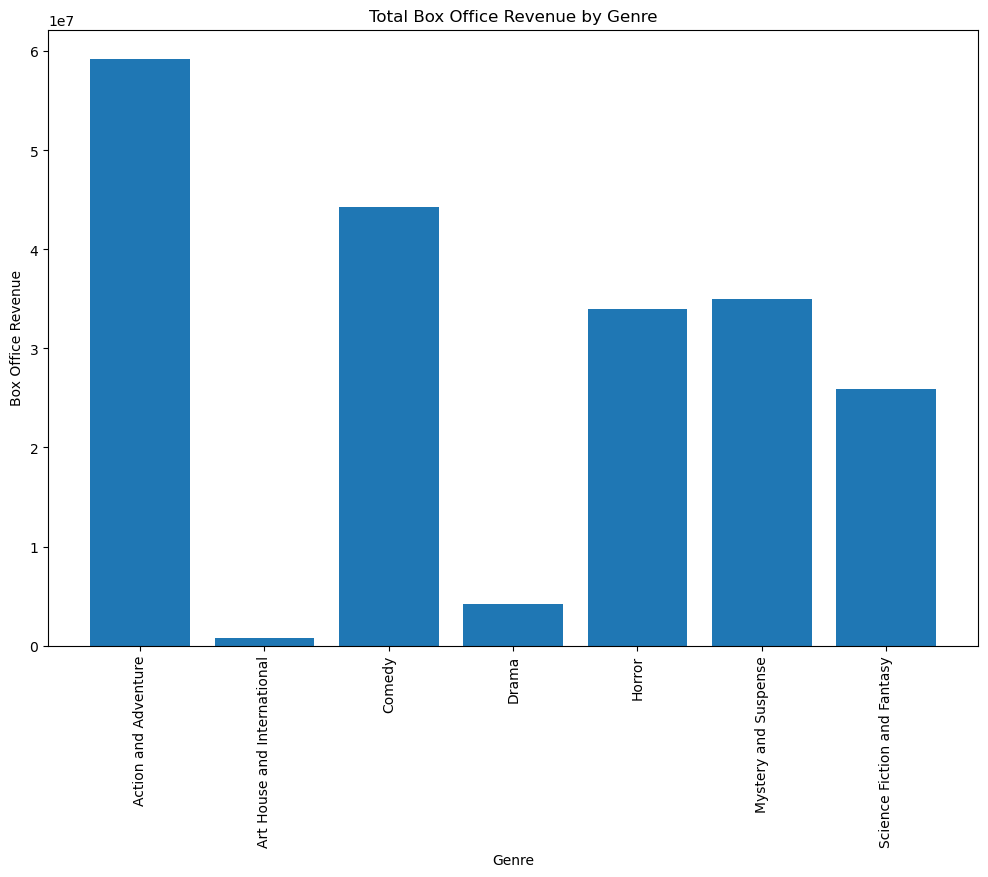

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe from the given data
data = {'genre': ['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama', 'Drama', 'Comedy|Drama|Mystery and Suspense', 'Action and Adventure|Science Fiction and Fantasy', 'Comedy|Drama', 'Horror|Mystery and Suspense', 'Art House and International|Comedy|Drama', 'Action and Adventure|Horror|Mystery and Suspense'],
        'box_office': [600000, 41032915, 224114, 134904, 1039869, 25335935, 1416189, 59371, 794306, 33886034]}
df = pd.DataFrame(data)

# split genre strings into separate genres
df['genre'] = df['genre'].str.split('|')

# create a separate row for each genre
df = df.explode('genre')

# group by genre and sum the box office revenue
grouped = df.groupby('genre')['box_office'].sum()

# create a bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(grouped.index, grouped.values)
ax.set_title('Total Box Office Revenue by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Box Office Revenue')
plt.xticks(rotation=90)
plt.show()

from above, it shows that the action and adventure genres have more sales, followed closely by Commedy. This is from a sample of the first 20 genres in the provided data set.Therefore microsoft should look forward into investing in Action related genres and Commedy.

Tackling Question 3
How can Microsoft new movie studio position it self to be come the best?

#Microsoft can position itself by consideriung the perfomance of previous genres and subsequent revenue to decide on the best.
Consider the performance of various directors as per the movies created

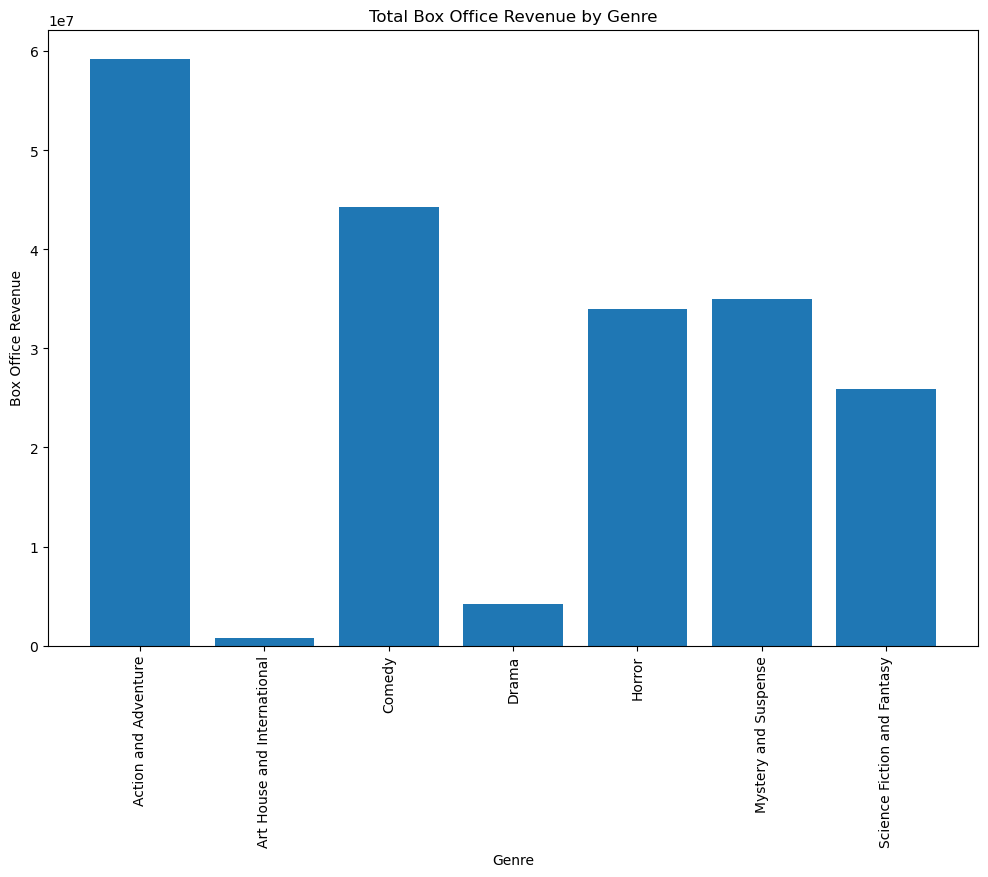

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe from the given data
data = {'genre': ['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama', 'Drama', 'Comedy|Drama|Mystery and Suspense', 'Action and Adventure|Science Fiction and Fantasy', 'Comedy|Drama', 'Horror|Mystery and Suspense', 'Art House and International|Comedy|Drama', 'Action and Adventure|Horror|Mystery and Suspense'],
        'box_office': [600000, 41032915, 224114, 134904, 1039869, 25335935, 1416189, 59371, 794306, 33886034]}
df = pd.DataFrame(data)

# split genre strings into separate genres
df['genre'] = df['genre'].str.split('|')

# create a separate row for each genre
df = df.explode('genre')

# group by genre and sum the box office revenue
grouped = df.groupby('genre')['box_office'].sum()

# create a bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(grouped.index, grouped.values)
ax.set_title('Total Box Office Revenue by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Box Office Revenue')
plt.xticks(rotation=90)
plt.show()

#merge bom_df and rt_df

In [45]:
merged_bom_rt_df = pd.merge(bom_df,rt_df,on='studio')

merged_bom_rt_df.head(30)

,title,studio,domestic_gross,year,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
1,Inception,WB,292600000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
2,Clash of the Titans (2010),WB,163200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
3,Due Date,WB,100500000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
4,Yogi Bear,WB,100200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
5,The Book of Eli,WB,94800000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
6,The Town,WB,92200000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
7,Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
8,Cats & Dogs: The Revenge of Kitty Galore,WB,43600000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
9,Life as We Know It,WB,53400000.0,2010,611,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes


In [44]:
#Profitability

df_profit = merged_bom_tn_df['worldwide_gross'] - merged_bom_tn_df['production_budget']

print(df_profit)

0       868879522.0
1       675524642.0
2       591244673.0
3       638102828.0
4       451156389.0
           ...     
1242     -3910900.0
1243     -3366889.0
1244    -29351401.0
1245     -4572344.0
1246     -5544973.0
Length: 1247, dtype: float64


In [70]:
rt_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

#creating a new data frame of genres and box_office.

director_box_df = rt_df[['director','box_office']]

print(director_box_df.head(20))

               director  box_office
0      William Friedkin         NaN
1      David Cronenberg     600,000
2        Allison Anders         NaN
3        Barry Levinson         NaN
4        Rodney Bennett         NaN
5           Jay Russell         NaN
6           Jake Kasdan  41,032,915
7          Ray Lawrence     224,114
8       Taylor Hackford     134,904
9        Frank Marshall         NaN
10                  NaN         NaN
11                  NaN         NaN
12                  NaN         NaN
13     William Friedkin         NaN
14        Peter Baldwin         NaN
15  George Hickenlooper   1,039,869
16                  NaN  99,165,609
17       Rick Rosenthal         NaN
18     Carl Erik Rinsch  20,518,224
19         Jim Jarmusch   1,971,135


In [71]:
#cleaning the new dataframe created

director_box_df.dropna(subset=['box_office'],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12160\3413251658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_box_df.dropna(subset=['box_office'],inplace=True)


In [72]:
director_box_df

,director,box_office
1,David Cronenberg,"600,000"
6,Jake Kasdan,"41,032,915"
7,Ray Lawrence,"224,114"
8,Taylor Hackford,"134,904"
15,George Hickenlooper,"1,039,869"
...,...,...
1541,Joss Whedon,"25,335,935"
1542,Gauri Shinde,"1,416,189"
1545,Sebastian Gutierrez,"59,371"
1546,NaN,"794,306"


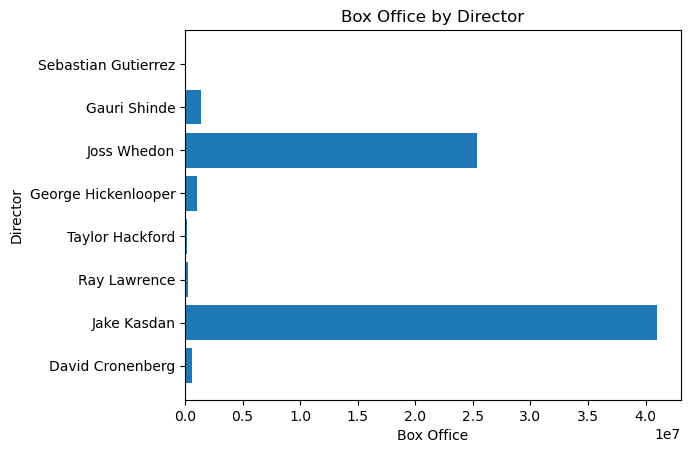

In [75]:
import matplotlib.pyplot as plt

directors = ['David Cronenberg', 'Jake Kasdan', 'Ray Lawrence', 'Taylor Hackford', 'George Hickenlooper', 'Joss Whedon', 'Gauri Shinde', 'Sebastian Gutierrez']
box_office = [600000, 41032915, 224114, 134904, 1039869, 25335935, 1416189, 59371]

plt.barh(directors, box_office)
plt.xlabel('Box Office')
plt.ylabel('Director')
plt.title('Box Office by Director')
plt.show()

From the graph above, microsoft should consider Directors whose movies made more sales for instance, David Cronenberg and Joss Whedon in their studio.